**5. 데이터 전처리**

ML 알고리즘을 적용하기 전 데이터에 미리 처리해야 할 기본 사항이 존재함

1) 결손값(NaN, Null)
- Null 값이 존재하면 고정된 다른 값으로 변환해야 함 -> 이는 경우에 따라 다름
  - Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체 가능
  - Null 값이 대부분이라면 해당 피처를 드롭하는 것이 좋음
   
    -> 이에 대한 정확한 수치는 없으나 **피처의 중요도, 왜곡 가능성을 고려**하여 정하는 것이 중요함!

2) 문자열의 입력값(피처)
- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음

  -> 모든 문자열의 값을 인코딩하여 숫자형으로 변환해야 함
  - 카테고리형 피처:
  - 텍스트형 피처: 피처 벡터화(feature vectorization) 등의 기법으로 백터화 하거나 불필요한 피처라고 판단되면 삭제하는 것이 좋음

데이터 인코딩

- 레이블 인코딩
  - 카테고리 피처를 코드형 숫자값으로 변환하는 것
  - 사이킷런의 레이블 인코딩(Label Encoding)은 LabelEncoder 클래스에서 구현됨
  - Label Encoder를 객체로 생성한 이후 fit()과 transform()을 호출하여 레이블 인코딩을 수행함

In [1]:
from sklearn.preprocessing import LabelEncoder
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩을 ㅜㅅ행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


이를 보아 TV: 0, 냉장고: 1, 전자레인지: 4, 컴퓨터: 5, 선풍기:3, 믹서:2로 변환된 것을 확인할 수 있음

이때 문자열의 값이 어떤 숫자값으로 인코딩 되었는지 직관적으로 알 수 없는 경우 LabelEncoder객체의 classes_ 속성값으로 확인하기

In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


이때 속성이 0번부터 순서대로 변환된 인코딩 값에 대한 원본값의 형태로 나타나는 것을 확인할 수 있다. 이를 invers_transform()을 이용하여 인코딩된 값을 다시 디코딩해보자

In [3]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


즉 상품 데이터가 상품 분류, 가격 두개의 속성으로 되어 있을 때 상품 분류를 레이블 인코딩하면 간단하게 문자열 값을 숫자형 카테고리 값으로 변환가능한 것을 확인 가능하다.

하지만 레이블 인코딩이 일괄적인 숫자값으로 변환이 되면서 ML 알고리즘 중 일부느 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생한다. 그 이유는 숫자값의 경우 크고 작음에 대한 특성이 작용하기 때문이다. 따라서 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않고, 트리 계열의 ML알고리즘에서만 사용한다.

원-핫 인코딩은 이러한 문제를 해결하기 위해 나타났다.

- 원-핫 인코딩(One-Hot Encoding)
  - 피처 값의 유형에 따라 새로운 피처를 추가하여 고유의 값에 해당한느 칼럼만을 1로 표시하고 나머지 칼럼에는 0을 표시하는 방식
  - 행의 형태로 된 고유 값을 열 형태로 차원을 변환한 후, 고유값에 해당하는 칼럼만 1을 표시하고 나머지 칼럼에는 0을 표시함
  - 사이킷런에서 OneHotEncoder 클래스로 변환이 가능함
  - 단 여기서 입력값으로 2차원의 데이터가 필요하고, OneHotEncoder를 이용하여 변환한 값이 희소행렬(Sparse Matrix) 형태이므로 이를 다시 toarray()메서드를 이용하여 밀집행렬(Dense Matrix)로 변환해야 함

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환합니다.
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용하여 밀집 형렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


해당 8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환된 것을 확인 가능하다.

판다스에는 이를 더 쉽게 지원하는 API가 있는데 바로 get_dummies()이다.
이는 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요없이 바로 변환이 가능하다.

In [5]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df).astype(int) # 0과 1로 나타나도록 변환

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


이를 이용하면 숫자형값으로 변환 없이도 바로 변환이 가능한 것을 확인가능하다.

피처 스케일링과 정규화

: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라 하며, 대표적으로 표준화(standardization)와 정규화(normalization)이 있음

- StandardScaler
  - 표준화를 쉽게 지원하기 위한 클래스
  - 개별 피처를 평균이 0이고 분산이 1인 값으로 변환하여 가우시안 정규분포를 가질 수 있도록 함
  - 가우시안 정규분포는 서포트 백터머신, 선형 회귀, 로지스틱 회귀에서 예측 성능 향상에 중요한 요소가 될 수 있음

  다음 예시에서 StadardScaler가 어떻게 데이터 값을 변환하는지 데이터 세트로 확인하자.

In [6]:
from sklearn.datasets import load_iris
import pandas as od
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


이들을 한번에 표준화하여 변환하자.

 이때 StandardScaler 객체를 생성한 후 fit()과 transform()메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 변환이 가능하다.

In [7]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환, fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환덴 데이터 세트가 NumPy ndarray로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


이를 보면 모든 칼럼 값의 평균이 0에 아주 가까운 값으로 분산은 1에 가까운 값으로 변환됨을 확인가능하다.

- MinMaxScaler
  - 데이터값을 0과 1 사이의 범위값으로 변환함 (음수의 경우 -1에서 1의 값으로 변환)
  - 데이터의 분포가 가우시안 분포가 아닐경우 Min, Max Scale을 적용가능


In [8]:
from sklearn.preprocessing import MinMaxScaler

# MinMasScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환, fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환 된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


마찬가지로 모든 피처에 0에서 1사이 값으로 변환되는 스케일링이 적용된 걸 확인 가능

- 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1) 로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

여기서 학습 데이터인 train_array부터 MinMaxScaler을 이용하여 변환하도록 하자
여기에 fit()을 적용하면 최솟값 0 최댓값 10이 설정되고 1/10 scale이 적용됨
여기서 transform()을 호출하면 1/10 scale로 학습데이터를 반환하고 원본 데이터는 1을 0.1, 2를 0.2로 변환하여 10을 1로 변환함

In [10]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0-1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값은 10으로 설정됨
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터를 변환함. 원본 10 -> 1로 변환
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터;', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터; [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이번엔 테스트 데이터를 변환해보자.

In [11]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터를 변환함. 원본 5 ->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


여기서 출력 결과가 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다.

따라서 테스뎅터에 fit()을 호출하지 않고 학습데이터 fit을 수행한 MinMaxScaler 객체의 transform()을 이용하여 데이터를 변환하면 두 데이터가 모두 동일하게 변환되는 것을 확인할 수 있다.

In [12]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


학습 데이터와 테스트 데이터의 fit(), transform(), fot_transform()을 이용하여 스케일링 변환 시 유의할 점
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler객체를 이용하여 transform()으로 변환

**6. 사이킷런으로 수행하는 타이타닉 생존자 예측**
- 타이타닉 탑승자 데이터 확인하기
  - Passengerid: 탑승자 데이터 일련번호
  - survived: 생존 여부(0 = 사망, 1 = 생존)
  - pclass: 티켓의 선실 등급(1= 일등석, 2=이등석, 3=삼등석)
  - sex: 탑승자 성별
  - name: 탑승자 이름
  - Age: 탑승자 나이
  - sibsip: 같이 탑승한 형제자매 또는 배우자 인원수
  - parch: 같이 탑승한 부모님 또는 어린이 인원수
  - ticket: 티켓 번호
  - fare: 요금
  - cabin: 선실 번호
  - embarked: 중간 정착 항구(C=Cherbourg, Q=Queenstown, S=Southampton)
  

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


이제 로딩된 데이터 칼럼 타입을 info() 메서드를 이용하여 확인해보자

In [15]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- RangeIndex: DataFrame 인덱스의 범위를 나타냄 (전체 로우 수 확인 가능)
- titanic_df는 총 891개의 로우로 구성됨
- Age, Cabin, Enbarked 칼럼은 각 177, 608, 2개의 Null 값을 가지고 있음

  -> 해당 칼럼의 데이터 전처리 필요!
  - DataFrame의 fillna()를 이용하여 간단하게 Null 값의 평균이나 고정값으로 변경
  - 여기선 Age의 경우 평균 나이, 나머지 칼럼은 N 값으로 변경

In [16]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


<ipython-input-16-6403b48444bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-16-6403b48444bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

현재 남아있는 문자열 피처는 Sex, Cabin, Embarked이므로 이들의 값 분류를 살펴보자

In [17]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\nCabin값 분포:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin값 분포:
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked 값 분포
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


Sex와 Embarked에는 문제가 없지만 Cabin의 경우 N이 687건으로 가장 많고, 속성값도 정리되어 있지 않은 것을 확인할 수 있다. 따라서 Cabin에서 선실 등급을 나타내는 중요한 값인 첫 번째 알파벳만을 추출하도록 하자

In [18]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


머신러닝 알고리즘을 적용하여 예측을 수행하기 전 데이터를 먼저 탐색해보자.
먼저 어떤 유형의 승객이 생존 확률이 높았는지 확인해보자.

일반적으로 바다에서 사고가 나는 경우 여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상이 되고 이후 부자나 유명인이 다음 구조 대상이 된다. 따라서 성별이 생존 확률에 어떠한 영향을 미쳤는지를 확인하기 위하여 성별에 따른 생존자 수를 비교해보자

In [19]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

표를 확인해보면 탑승객은 남자가 577명 여자가 314명으로 남자가 더 많은 것을 확인할 수 있다. 하지만 여자는 314명 중 233명으로 74.2%가 생존한 반면, 남자의 경우 577명 중 109명으로 18.8% 만 생존한 것을 확인할 수 있었다. 이를 그래프로 표현하면 다음과 같다.

<Axes: xlabel='Sex', ylabel='Survived'>

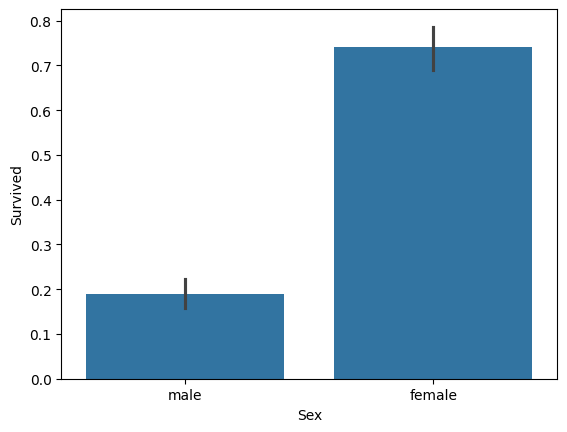

In [20]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

이번에 부자와 가난한 사람간의 생존 확률을 마찬가지로 그래프를 이용하여 나타내서 분석해보자

<Axes: xlabel='Pclass', ylabel='Survived'>

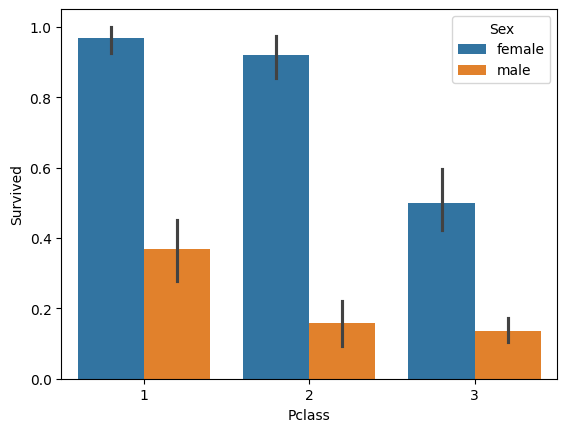

In [21]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

해당 그래프를 보았을 대 여성의 경우 1, 2등실 간의 생존 확률 차이는 크지 않으나, 3등실의 경우 생존확률이 급격하게 떨어지는 것을 확인할 수 있었다. 남성의 경우 1등실의 생존확률 비율이 2,3등실 생존확률보다 월등히 높다는 것을 파악할 수 있었다.

다음으로 Age에 따른 생존 확률을 알아보자. Age는 값의 종류가 많기 때문에 범주로 나누어 해당 카테고리에 해당하는 값을 할당하도록 하자.

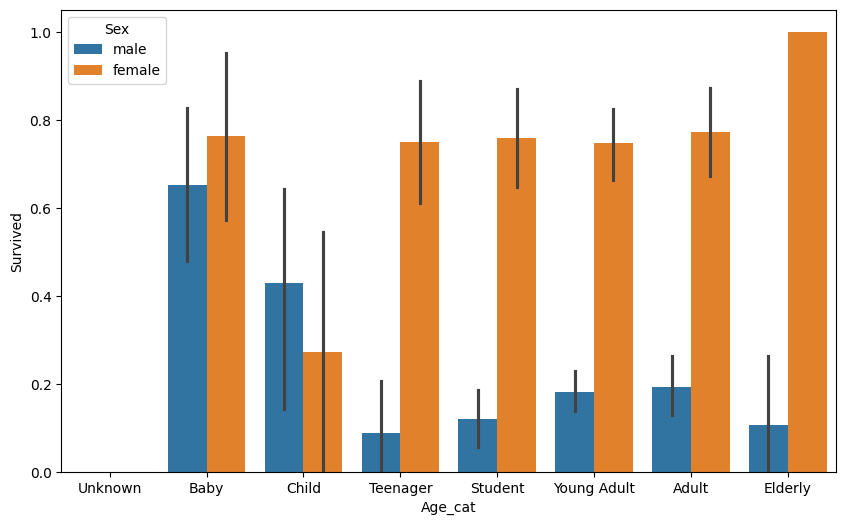

In [23]:
# 입력 age에 따라 구분 값을 반환한는 함수 설정. DataFrame의 apply.lambda 식에 사용함.
def get_category(age):
  cat=''
  if age <=-1: cat='Unknown'
  elif age <= 5: cat='Baby'
  elif age <=12: cat= 'Child'
  elif age <=18: cat='Teenager'
  elif age <=25: cat='Student'
  elif age <=35: cat='Young Adult'
  elif age <=60: cat='Adult'
  else: cat='Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
plt.show(block=True)
plt.pause(1)
titanic_df.drop('Age_cat', axis=1, inplace=True)


여자 Baby의 경우 비교적 생존확률이 높으나 여자 Child의 경우 다른 연령대에 비해 생존확률이 낮은 것을 확인할 수 있다. 추가적으로 여자 Elderly의 경우는 생존확률이 매우 높은 것을 확인할 수 있었다.

지금까지의 결과를 확인해보면 Sex, Age, PClass는 생존을 좌우하는 중요한 피처임을 알 수 있었다. 이제 남은 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하자.

In [24]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features=['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


이를 통해 Sex, Cabin, Embarked의 속성이 숫자형으로 바뀐 것을 확인할 수 있다.
- 데이터의 전처리를 전체적으로 호출하는 함수: transform_features()
  - Null 처리, 불필요한 피처 제거, 인코딩을 수행하는 내부함수로 구성됨
  - 불필요한 피처 제거: drop_features(df)
  
지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 형성하자.



In [25]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행.
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

이렇게 데이터의 전체적인 전처리를 수행하는 transform_features() 형성하고 난 후 원본 데이터를 이용하여 데이터를 가공하도록 하자, 이때 원본 CSV 파일을 다시 로딩하고 여기에 있는 Survived 속성만 별도 분리하여 클래스 결정값 데이터 세트로 형성하고, 해당 속성을 드롭하여 피처 데이터 세트로 만들자.

In [26]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

<ipython-input-25-fee284de4784>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-25-fee284de4784>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

이때 내려받은 학습 데이터 세트를 기반으로 train_test_split() API를 이용하여 별도의 테스트 데이터 세트를 추출하자. 이때 크기는 전체의 20%로 하자

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

이를 이용하여 ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스택 회귀를 이용하여 타이타닉 생존자를 예측해보자.

사이킷런 기반의 머신러닝 코드에는 결정트리를 위해 DecisionTreeClassifier, 랜덤포레스트 기반 RandomForestClassifier, 로지스틱 회귀 기반 LogisticRegression 클래스를 제공한다.

사이킷런 클래스를 이용하여 train_test_split을 이용해 train set과 test set을 80:20으로 나누자.

이를 예측 성능 평가로 정확도를 기반으로 할 것이며 이를 위하여 Accuracy_score() API를 이용하자.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifir 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifir 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


3개의 알고리즘 중 LogisticRegression이 타알고리즘에 비해 높은 정확도를 나타내는 것을 확인할 수 있다. 하지만 아직까지는 최적화 작업이나 데이터 양이 충분하지 않기 때문에 어떤 알고리즘이 좋다고 확신할 수 없다

다음으로 교차검증을 이용하여 결정트리 모델의 평가를 이어진행해보도록하자. 여기선 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용하자

In [29]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개일 KFold 객체를 생성함, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체를 생성.
  kfold = KFold(n_splits=folds)
  scores= []

  # KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


이를 통해 평균 정확도는 약 78.23%임을 확인할 수 있었다. 다음으로 교차검증을 cross_val_score() API를 이용하여 수행하자.

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


여기서의 정확도는 위의 KFold와는 살짝 다른 것을 확인할 수 있는데, 이는 cross_val_scores()가 StratifiedKFold를 이용하여 폴드세트를 분할하기 때문이다.

마지막으로 GridSearchCV를 이용하여 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정하도록 하자.

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
